In [15]:
library(ggplot2)
library(qvalue)
library(cowplot)
library(dplyr)

In [2]:
df_coloc = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/coloc_GxC.csv", row.names=1)

df_coloc$snp_id = gsub(".*-","",df_coloc$eqtl)
df_coloc

gene,label,eqtl,PP4,study_id,celltype_tissue,snp_id
ATG10,9,ATG10-5_81395824_T_G,0.8845845,GCST006572,FPP_D11,5_81395824_T_G
ATG10,9,ATG10-5_81395824_T_G,0.8968670,GCST006572,P_FPP_D11,5_81395824_T_G
ATG10,9,ATG10-5_81395824_T_G,0.8259245,GCST006572,FPP_D30,5_81395824_T_G
ATG10,9,ATG10-5_81395824_T_G,0.8773539,GCST006572,DA_D30,5_81395824_T_G
ATG10,9,ATG10-5_81395824_T_G,0.7808354,GCST006572,Astro_D52_ROT,5_81395824_T_G
ATG10,9,ATG10-5_81395824_T_G,0.7256878,GCST006572,Astro_D52_NONE,5_81395824_T_G
ATG10,9,ATG10-5_81395824_T_G,0.5351271,GCST006572,DA_D52_ROT,5_81395824_T_G
ATG10,9,ATG10-5_81395824_T_G,0.8461358,GCST006572,DA_D52_NONE,5_81395824_T_G
ATG10,9,ATG10-5_81395824_T_G,0.5203575,GCST006572,Epen1_D52_NONE,5_81395824_T_G
ATG10,9,ATG10-5_81395824_T_G,0.6054000,GCST006572,Sert_D52_ROT,5_81395824_T_G


In [13]:
#load map HGNC to ensembl
mapping_df = read.csv('/nfs/leia/research/stegle/dseaton/genomes/hg19/annotation/geneid_mappings/hgnc_symbol2ensembl_gene_id.txt', sep='\t')
head(mapping_df,2)

hgnc_symbol,ensembl_gene_id
SLC25A26,ENSG00000261657
,ENSG00000223116


In [16]:
mapping_df$gene = mapping_df$hgnc_symbol
df_coloc = left_join(df_coloc, mapping_df)

Joining, by = "gene"


In [20]:
df_coloc

gene,label,eqtl,PP4,study_id,celltype_tissue,snp_id,hgnc_symbol,ensembl_gene_id
ATG10,9,ATG10-5_81395824_T_G,0.8845845,GCST006572,FPP_D11,5_81395824_T_G,ATG10,ENSG00000152348
ATG10,9,ATG10-5_81395824_T_G,0.8968670,GCST006572,P_FPP_D11,5_81395824_T_G,ATG10,ENSG00000152348
ATG10,9,ATG10-5_81395824_T_G,0.8259245,GCST006572,FPP_D30,5_81395824_T_G,ATG10,ENSG00000152348
ATG10,9,ATG10-5_81395824_T_G,0.8773539,GCST006572,DA_D30,5_81395824_T_G,ATG10,ENSG00000152348
ATG10,9,ATG10-5_81395824_T_G,0.7808354,GCST006572,Astro_D52_ROT,5_81395824_T_G,ATG10,ENSG00000152348
ATG10,9,ATG10-5_81395824_T_G,0.7256878,GCST006572,Astro_D52_NONE,5_81395824_T_G,ATG10,ENSG00000152348
ATG10,9,ATG10-5_81395824_T_G,0.5351271,GCST006572,DA_D52_ROT,5_81395824_T_G,ATG10,ENSG00000152348
ATG10,9,ATG10-5_81395824_T_G,0.8461358,GCST006572,DA_D52_NONE,5_81395824_T_G,ATG10,ENSG00000152348
ATG10,9,ATG10-5_81395824_T_G,0.5203575,GCST006572,Epen1_D52_NONE,5_81395824_T_G,ATG10,ENSG00000152348
ATG10,9,ATG10-5_81395824_T_G,0.6054000,GCST006572,Sert_D52_ROT,5_81395824_T_G,ATG10,ENSG00000152348


In [17]:
genes = as.character(unique(df_coloc$ensembl_gene_id))

In [18]:
genes

[1] "ENSG00000152348" "ENSG00000080644" "ENSG00000132507" "ENSG00000164574"
 [5] "ENSG00000174946" "ENSG00000117245" "ENSG00000205809" "ENSG00000264589"
 [9] "ENSG00000099308" "ENSG00000051825" "ENSG00000138653" "ENSG00000204961"
[13] "ENSG00000272794" "ENSG00000124587" "ENSG00000154229" "ENSG00000246334"
[17] "ENSG00000178226" "ENSG00000169220" "ENSG00000167550" "ENSG00000215790"
[21] "ENSG00000166888" "ENSG00000144455" "ENSG00000137822" "ENSG00000105278"

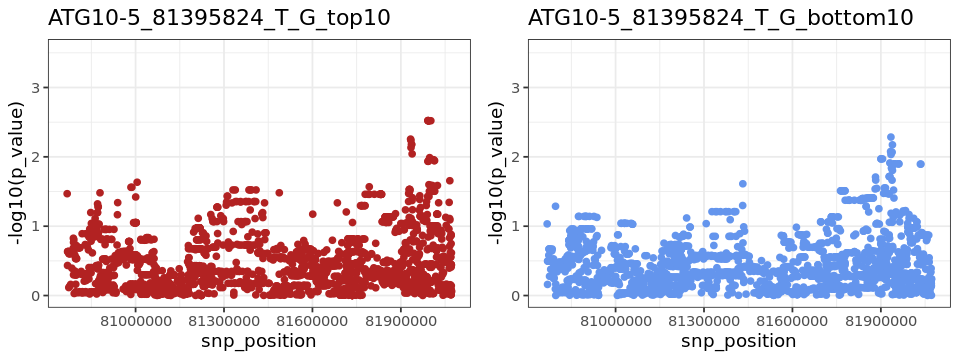

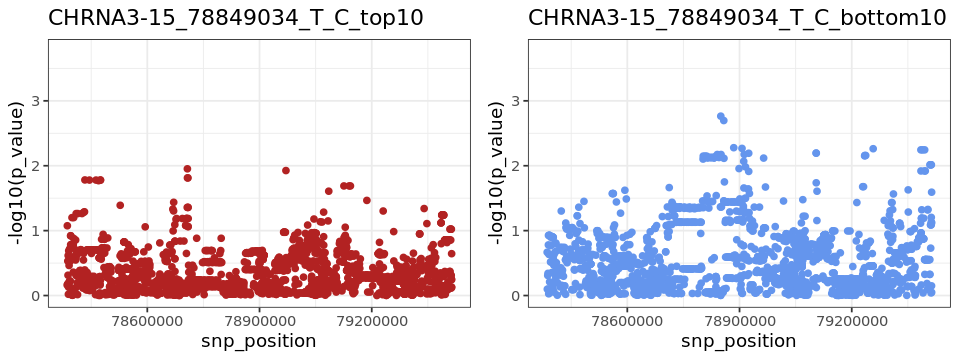

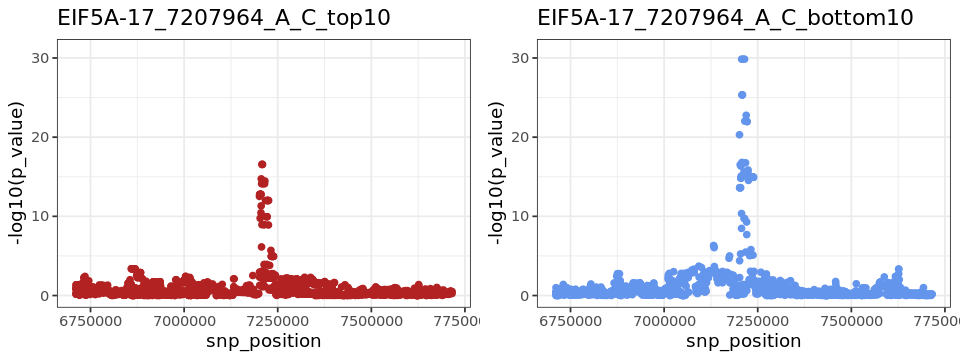

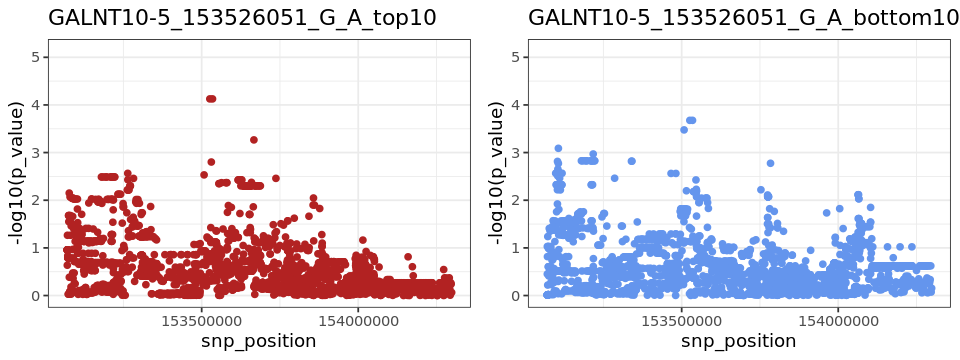

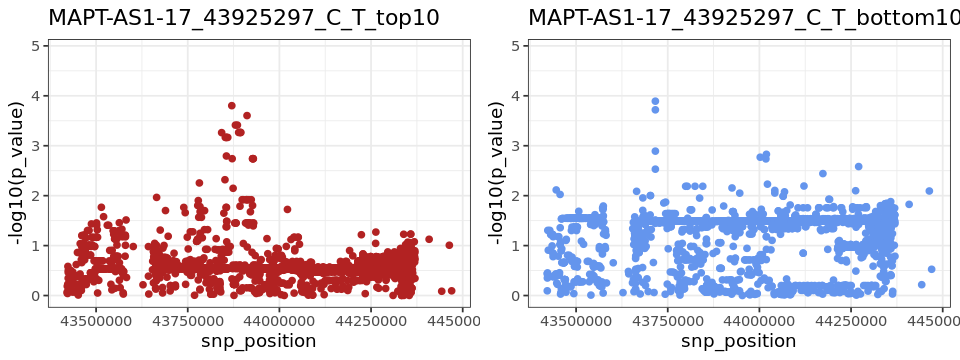

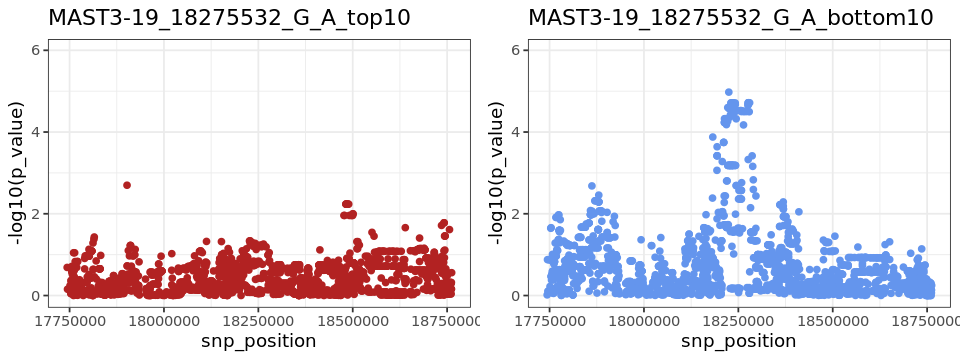

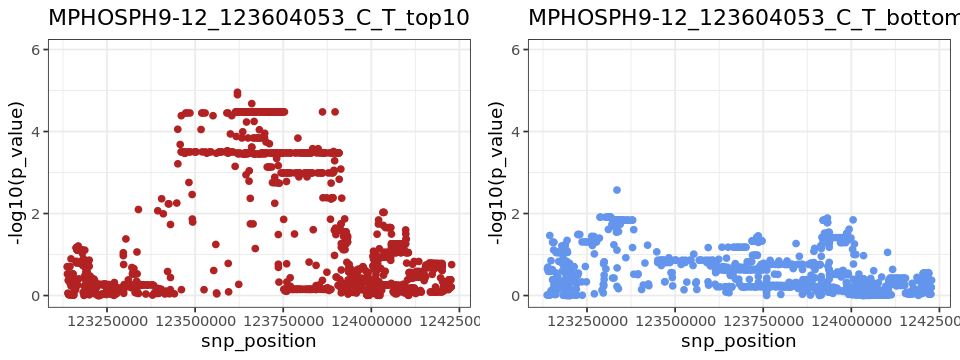

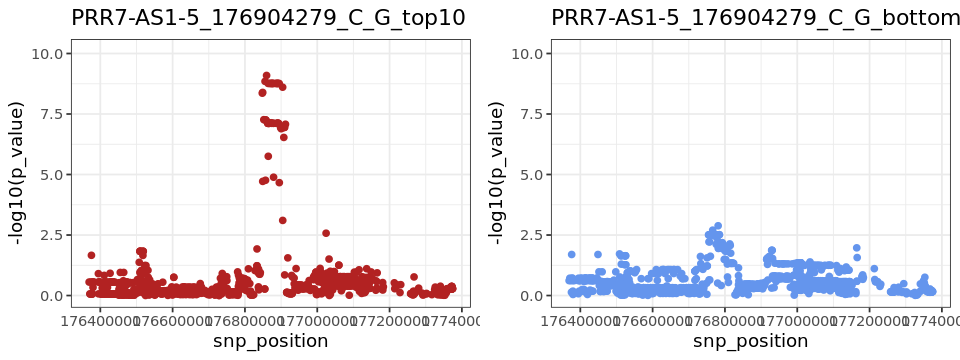

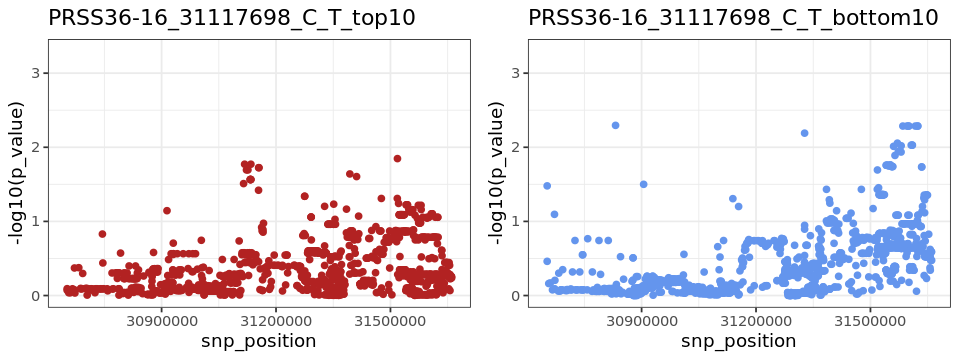

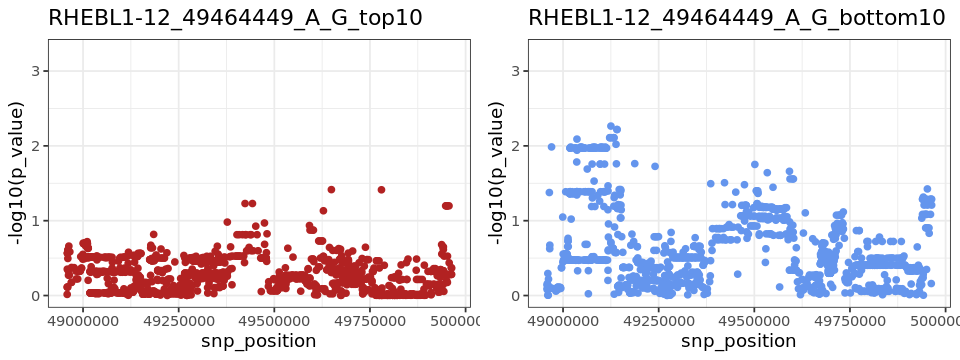

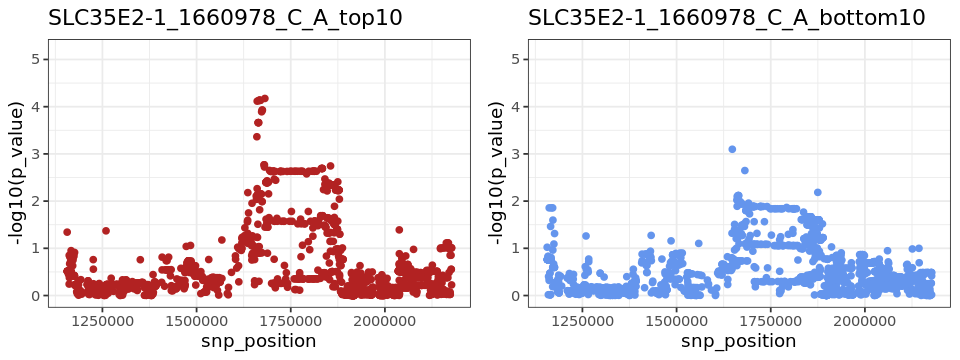

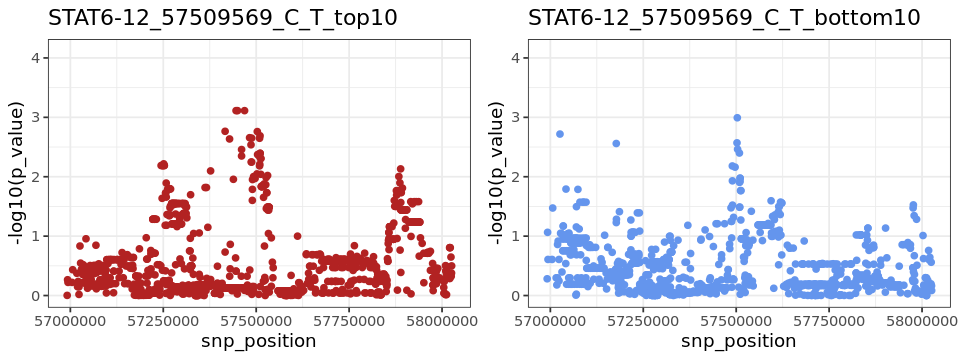

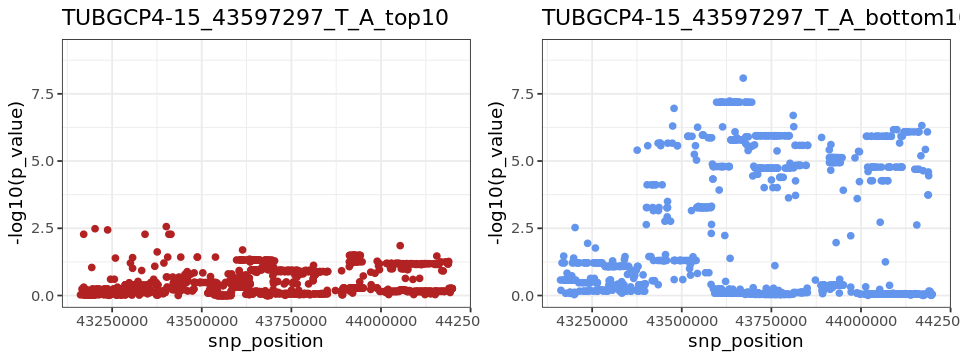

In [5]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/da_coloc_GxC/"
mydirs = list.files(mydir)
options(repr.plot.width = 8, repr.plot.height = 3)
for (i in 1:length(genes)){
# for (i in 6:13){
    gene_id = genes[i]
#     print(gene_id)
    gene_name = as.character(df_coloc[df_coloc$ensembl_gene_id == gene_id,"gene"][1])
#     print(gene_name)
    myfiles = mydirs[grep(paste0("input_files_",gene_name), mydirs)]
#     print(myfiles)
    filename_top = paste0(mydir,myfiles[2],"/results/qtl_results_all.txt")
#     print(filename_top)
    filename_bottom = paste0(mydir,myfiles[1],"/results/qtl_results_all.txt")
#     print(filename_bottom)
    df_top = read.csv(filename_top,sep="\t")
    df_to_plot1 = df_top[df_top$feature_id %in% gene_id,]
    m1 = min(df_to_plot1$p_value)
    df_bottom = read.csv(filename_bottom,sep="\t")
    df_to_plot2 = df_bottom[df_bottom$feature_id %in% gene_id,]
    m2 = min(df_to_plot2$p_value)
    m = -log10(min(m1,m2))+1
    p_top = ggplot(df_to_plot1, aes(x=snp_position,y=-log10(p_value))) + geom_point(col="firebrick") + theme_bw() + ylim(c(0,m))
    p_bottom = ggplot(df_to_plot2, aes(x=snp_position,y=-log10(p_value))) + geom_point(col="cornflowerblue") + theme_bw() + ylim(c(0,m))
    p_top = p_top + ggtitle(gsub("quantile","",gsub("input_files_","",myfiles[2])))
    p_bottom = p_bottom + ggtitle(gsub("quantile","",gsub("input_files_","",myfiles[1])))
    print(plot_grid(p_top, p_bottom, ncol=2))
}

In [4]:
#### DA day 30
filename0 = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/qtl_analysis/eqtl_discovery/celltype_DA/summary_stats/pool1_13_noddd_D30.DA.qtl_results_all.txt"
# df0 = read.csv(filename0,sep="\t")

In [5]:
#### DA day 52
filename1 = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/qtl_analysis/eqtl_discovery_separated_by_treatment/input_files_untreated/celltype_DA/summary_stats/pool1_17_D52.DA.qtl_results_all.txt"
# df1 = read.csv(filename1,sep="\t")

In [7]:
#### DA day 52 rotenone-treated
filename2 = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/qtl_analysis/eqtl_discovery_separated_by_treatment/input_files_ROT_treated/celltype_DA/summary_stats/pool1_17_D52.DA.qtl_results_all.txt"
# df2 = read.csv(filename2,sep="\t")

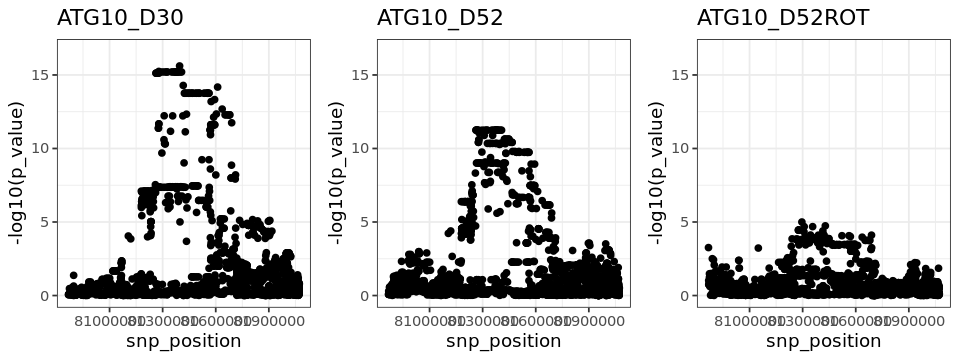

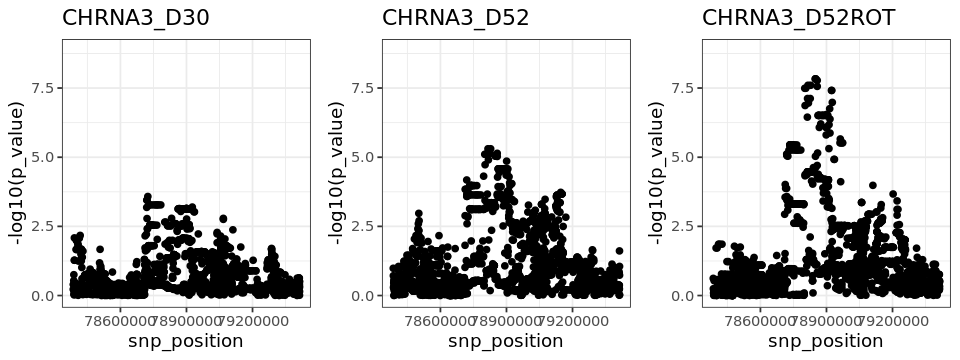

Warning message in min(df_to_plot$p_value):
“no non-missing arguments to min; returning Inf”Warning message in min(df_to_plot$p_value):
“no non-missing arguments to min; returning Inf”

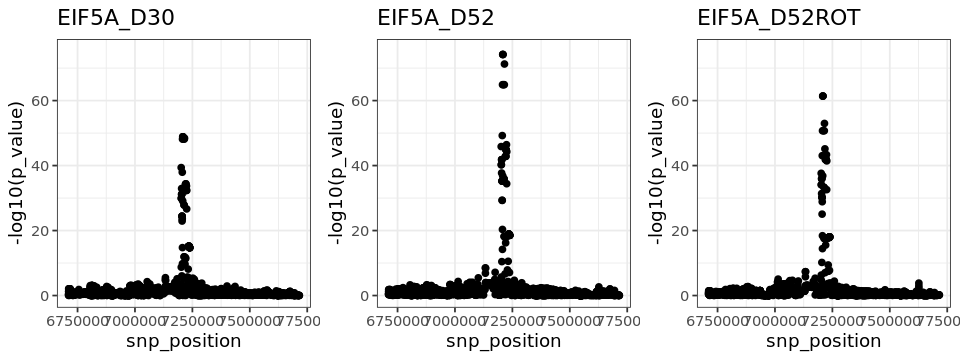

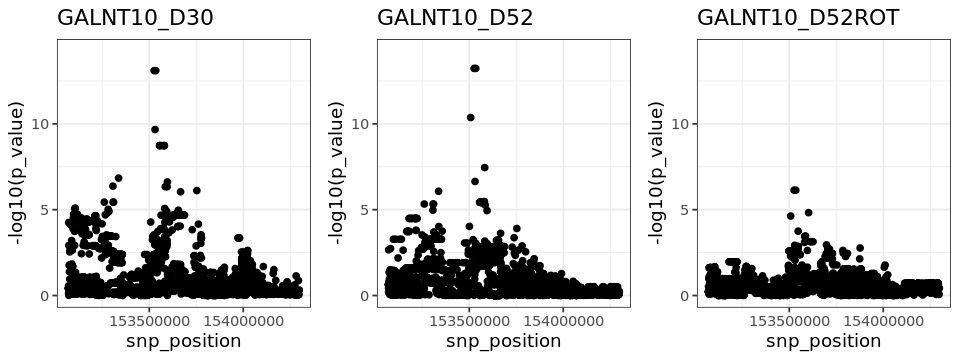

Warning message in min(df_to_plot$p_value):
“no non-missing arguments to min; returning Inf”Warning message in min(df_to_plot$p_value):
“no non-missing arguments to min; returning Inf”

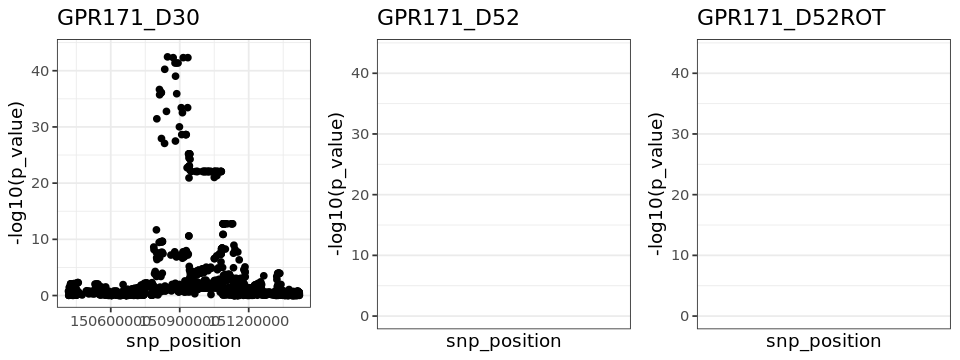

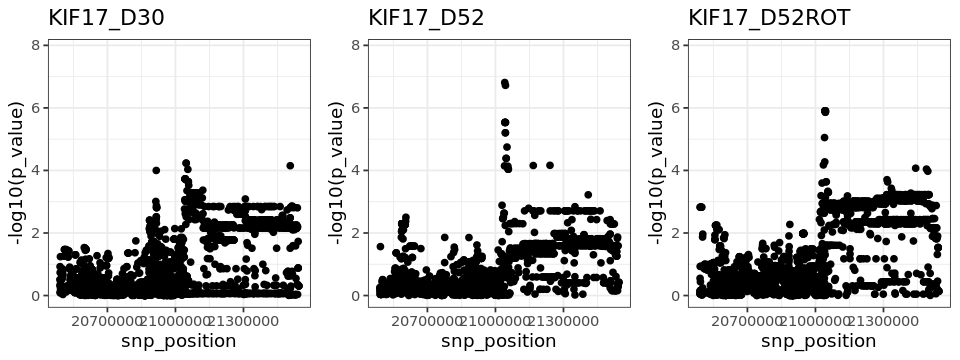

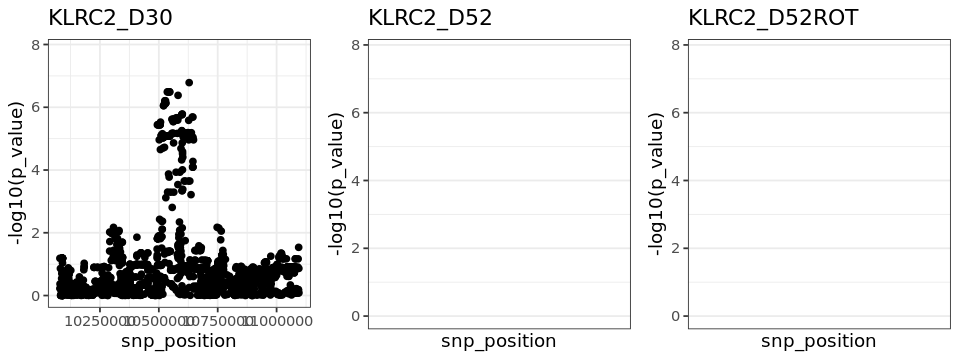

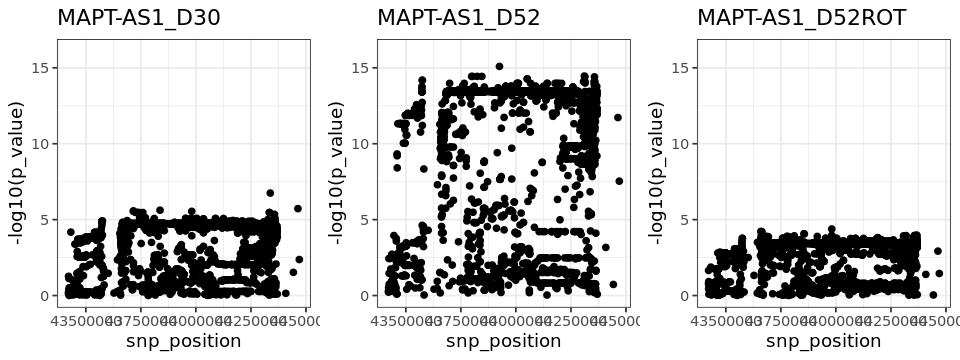

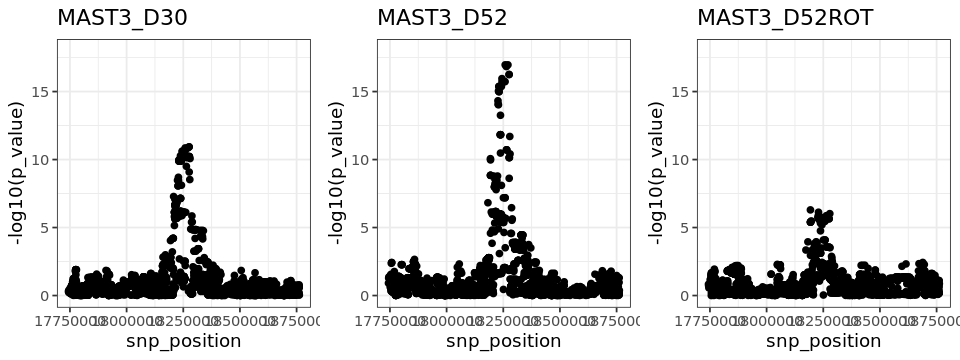

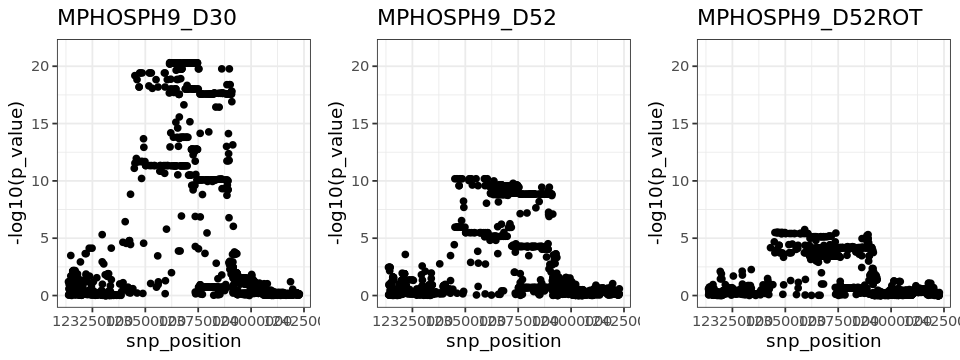

Warning message in min(df_to_plot$p_value):
“no non-missing arguments to min; returning Inf”Warning message in min(df_to_plot$p_value):
“no non-missing arguments to min; returning Inf”Warning message in min(df_to_plot$p_value):
“no non-missing arguments to min; returning Inf”

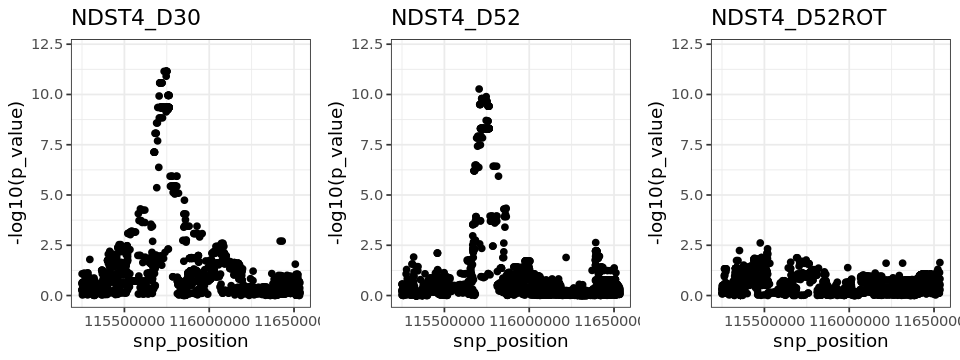

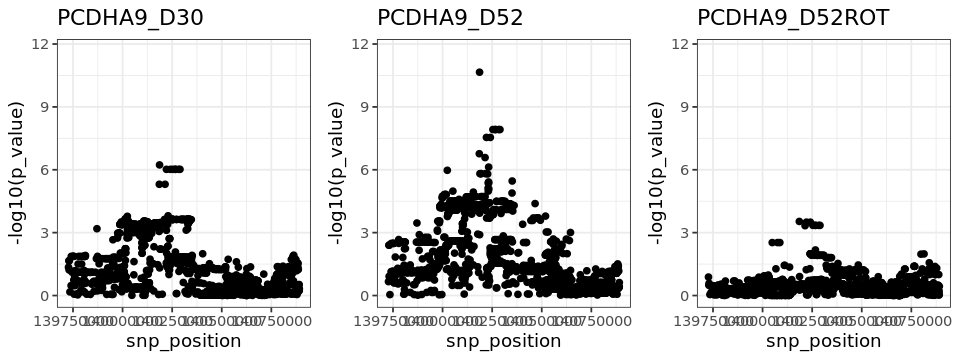

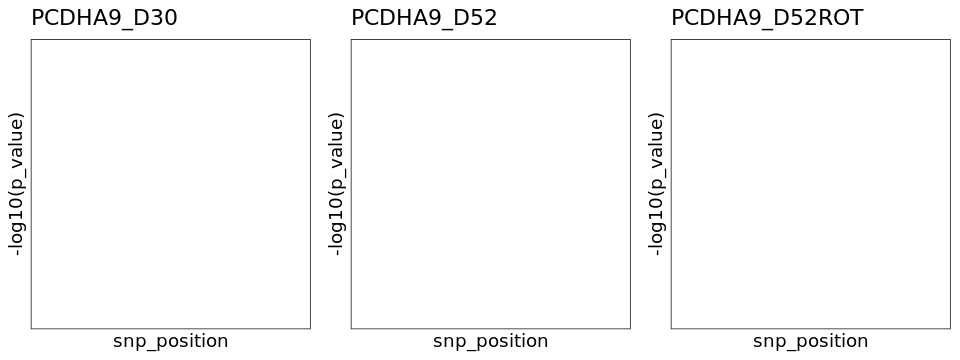

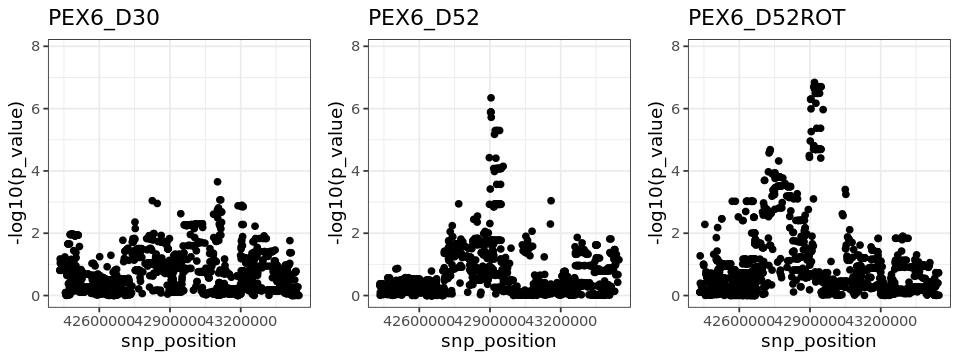

Warning message in min(df_to_plot$p_value):
“no non-missing arguments to min; returning Inf”

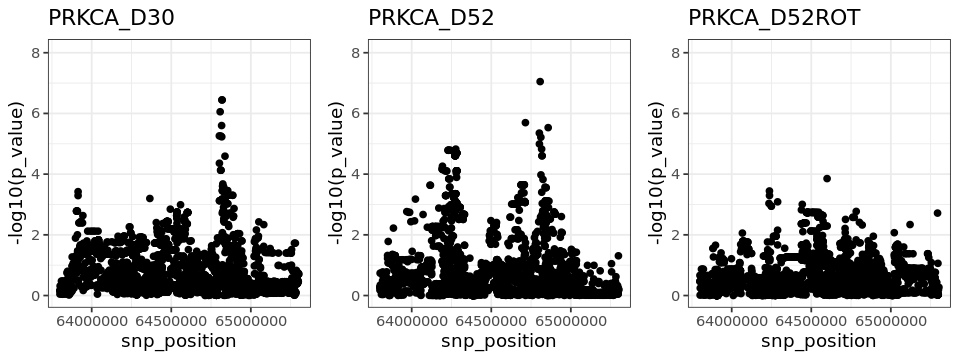

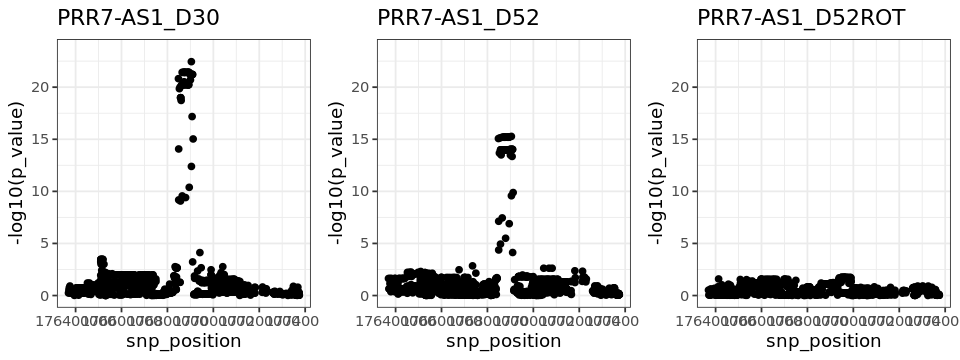

Warning message in min(df_to_plot$p_value):
“no non-missing arguments to min; returning Inf”

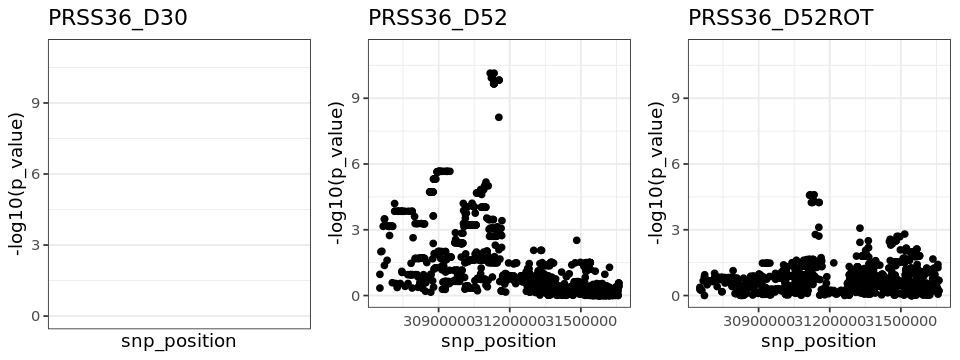

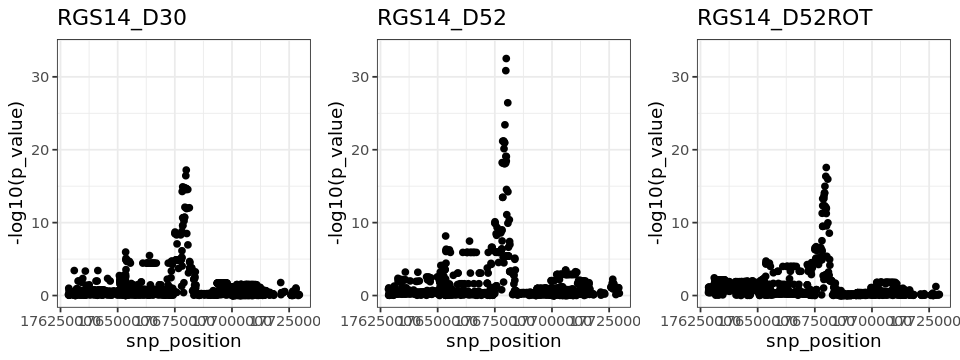

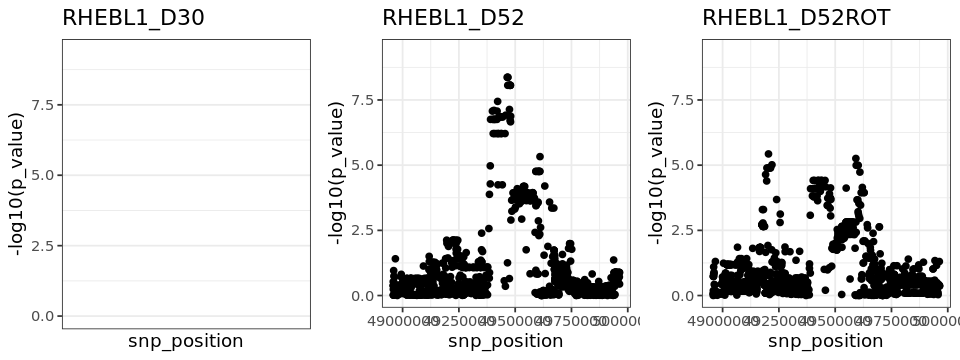

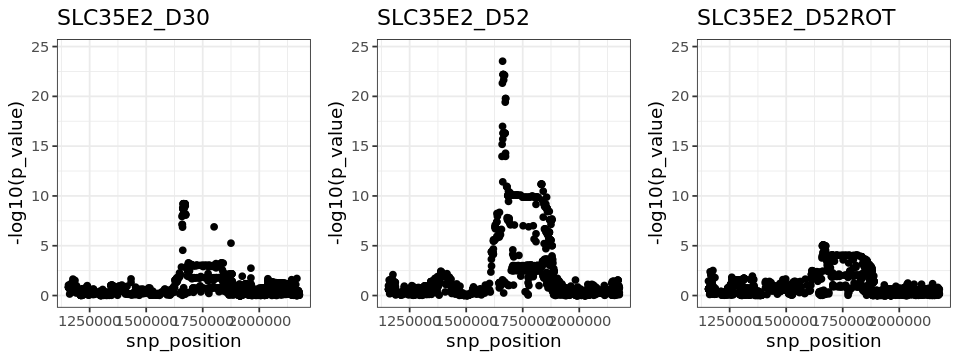

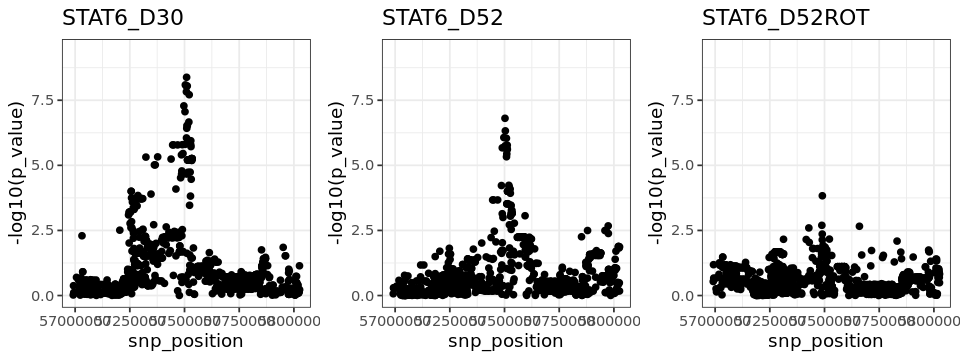

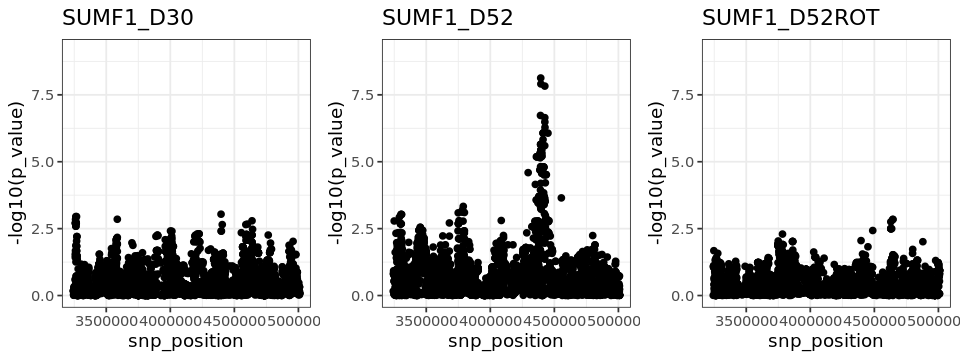

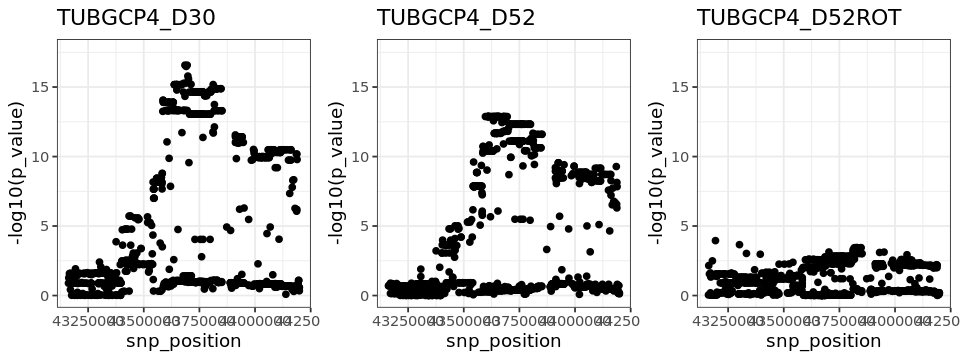

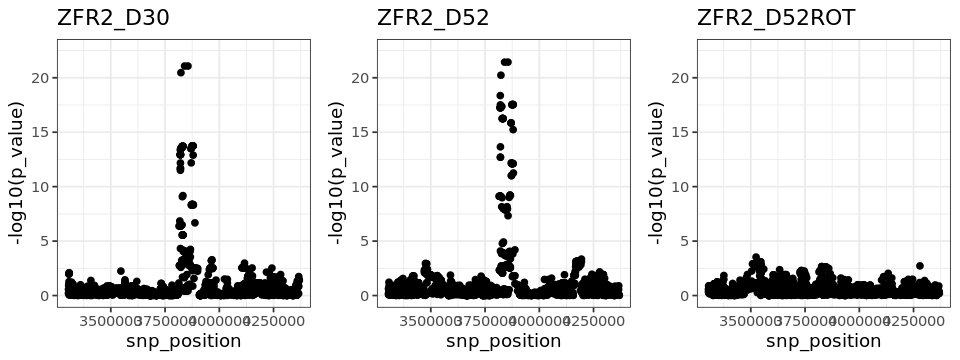

In [19]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/da_coloc_GxC/"
mydirs = list.files(mydir)
options(repr.plot.width = 8, repr.plot.height = 3)
for (i in 1:length(genes)){
    gene_id = genes[i]
    gene_name = as.character(df_coloc[df_coloc$ensembl_gene_id == gene_id,"gene"][1])
    df_to_plot = df0[df0$feature_id %in% gene_id,]
    m0 = min(df_to_plot$p_value)
    p0 = ggplot(df_to_plot, aes(x=snp_position,y=-log10(p_value))) + geom_point() + theme_bw() 
    df_to_plot = df1[df1$feature_id %in% gene_id,]
    m1 = min(df_to_plot$p_value)
    p1 = ggplot(df_to_plot, aes(x=snp_position,y=-log10(p_value))) + geom_point() + theme_bw() 
    df_to_plot = df2[df2$feature_id %in% gene_id,]
    m2 = min(df_to_plot$p_value)
    p2 = ggplot(df_to_plot, aes(x=snp_position,y=-log10(p_value))) + geom_point() + theme_bw() 
    m = -log10(min(m0,m1,m2))+1
    p0 = p0 + ggtitle(paste0(gene_name, "_D30")) + ylim(c(0,m))
    p1 = p1 + ggtitle(paste0(gene_name, "_D52")) + ylim(c(0,m))
    p2 = p2 + ggtitle(paste0(gene_name, "_D52ROT")) + ylim(c(0,m))
    print(plot_grid(p0, p1, p2, ncol=3))
}

In [26]:
gene_id = genes[7]

In [28]:
df_to_plot = df1[df1$feature_id == gene_id,]
df_to_plot
# ggplot(df_to_plot, aes(x=snp_position,y=-log10(p_value))) + geom_point() + theme_bw() 

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
